# Ensemble Algorithm
## Churn Dataset
### 

## Import Important Libraries and Evaluation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

### The dataset is about a company predicting the customers who can stop using its service due to several reasons.. so, if a customer can churn or not is what we have to look for.

### Read CSV file using Pandas

In [2]:
df = pd.read_csv('churn.csv')

#### Check Some Values

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Check shape

In [4]:
df.shape

(3333, 21)

#### We have 20 features and 1 taget column

### Rename our Target column from "Churn?" to "Churn"

In [5]:
df.rename(columns = {'Churn?':'Churn'}, inplace = True)

### Information about all columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

### Check for the null values

In [7]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

#### We don't have any null values in our data

### 
### Use LableEncoder to convert our Yes/No, True/False values to 0 and 1

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Check for the feature values again

In [9]:
df["Int'l Plan"] = le.fit_transform(df["Int'l Plan"])
df["VMail Plan"] = le.fit_transform(df["VMail Plan"])
df["Churn"] = le.fit_transform(df["Churn"])

df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Describe the dataset

In [10]:
df.describe()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### 
### Find the correlation between each features

<AxesSubplot:>

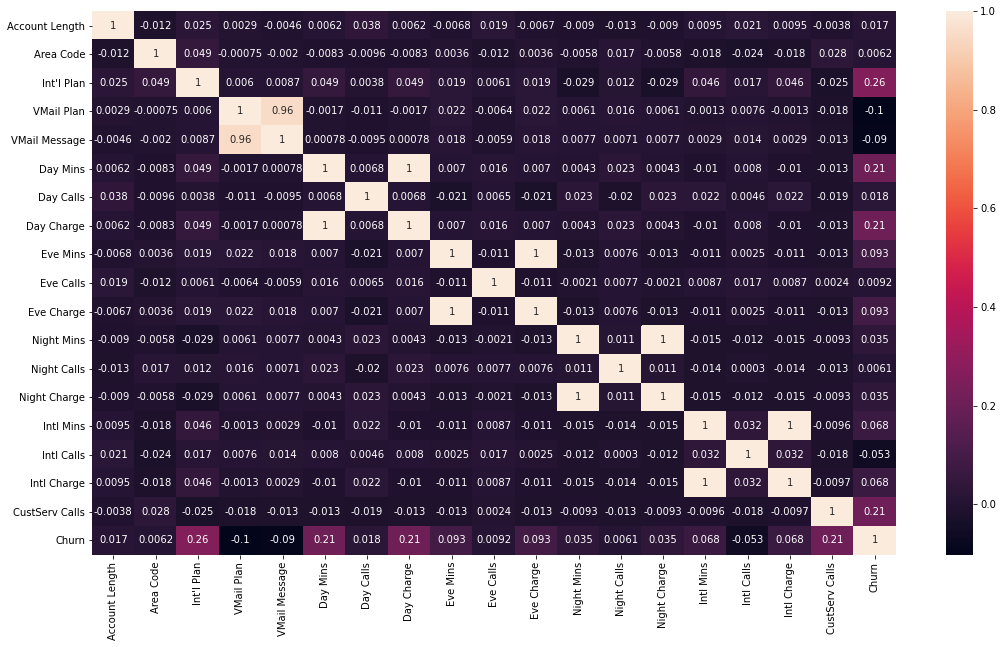

In [11]:
cr = df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(cr,annot=True)

### We can see that, some of the columns are highly correlated to each other.. 
### So, we need to remove some of them 

In [12]:
df = df.drop(columns=['VMail Message','Day Charge','Eve Charge','Night Charge','Intl Charge'])
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


### Some columns are having almost 0 impact on our target column. We will remove that columns too.

In [13]:
df = df.drop(columns=['Account Length','Area Code','Day Calls','Eve Calls','Night Calls','State','Phone'])
df.head()

,Int'l Plan,VMail Plan,Day Mins,Eve Mins,Night Mins,Intl Mins,Intl Calls,CustServ Calls,Churn
0,0,1,265.1,197.4,244.7,10.0,3,1,0
1,0,1,161.6,195.5,254.4,13.7,3,1,0
2,0,0,243.4,121.2,162.6,12.2,5,0,0
3,1,0,299.4,61.9,196.9,6.6,7,2,0
4,1,0,166.7,148.3,186.9,10.1,3,3,0


In [14]:
df.shape

(3333, 9)

### Barplot to understand churn based on the values

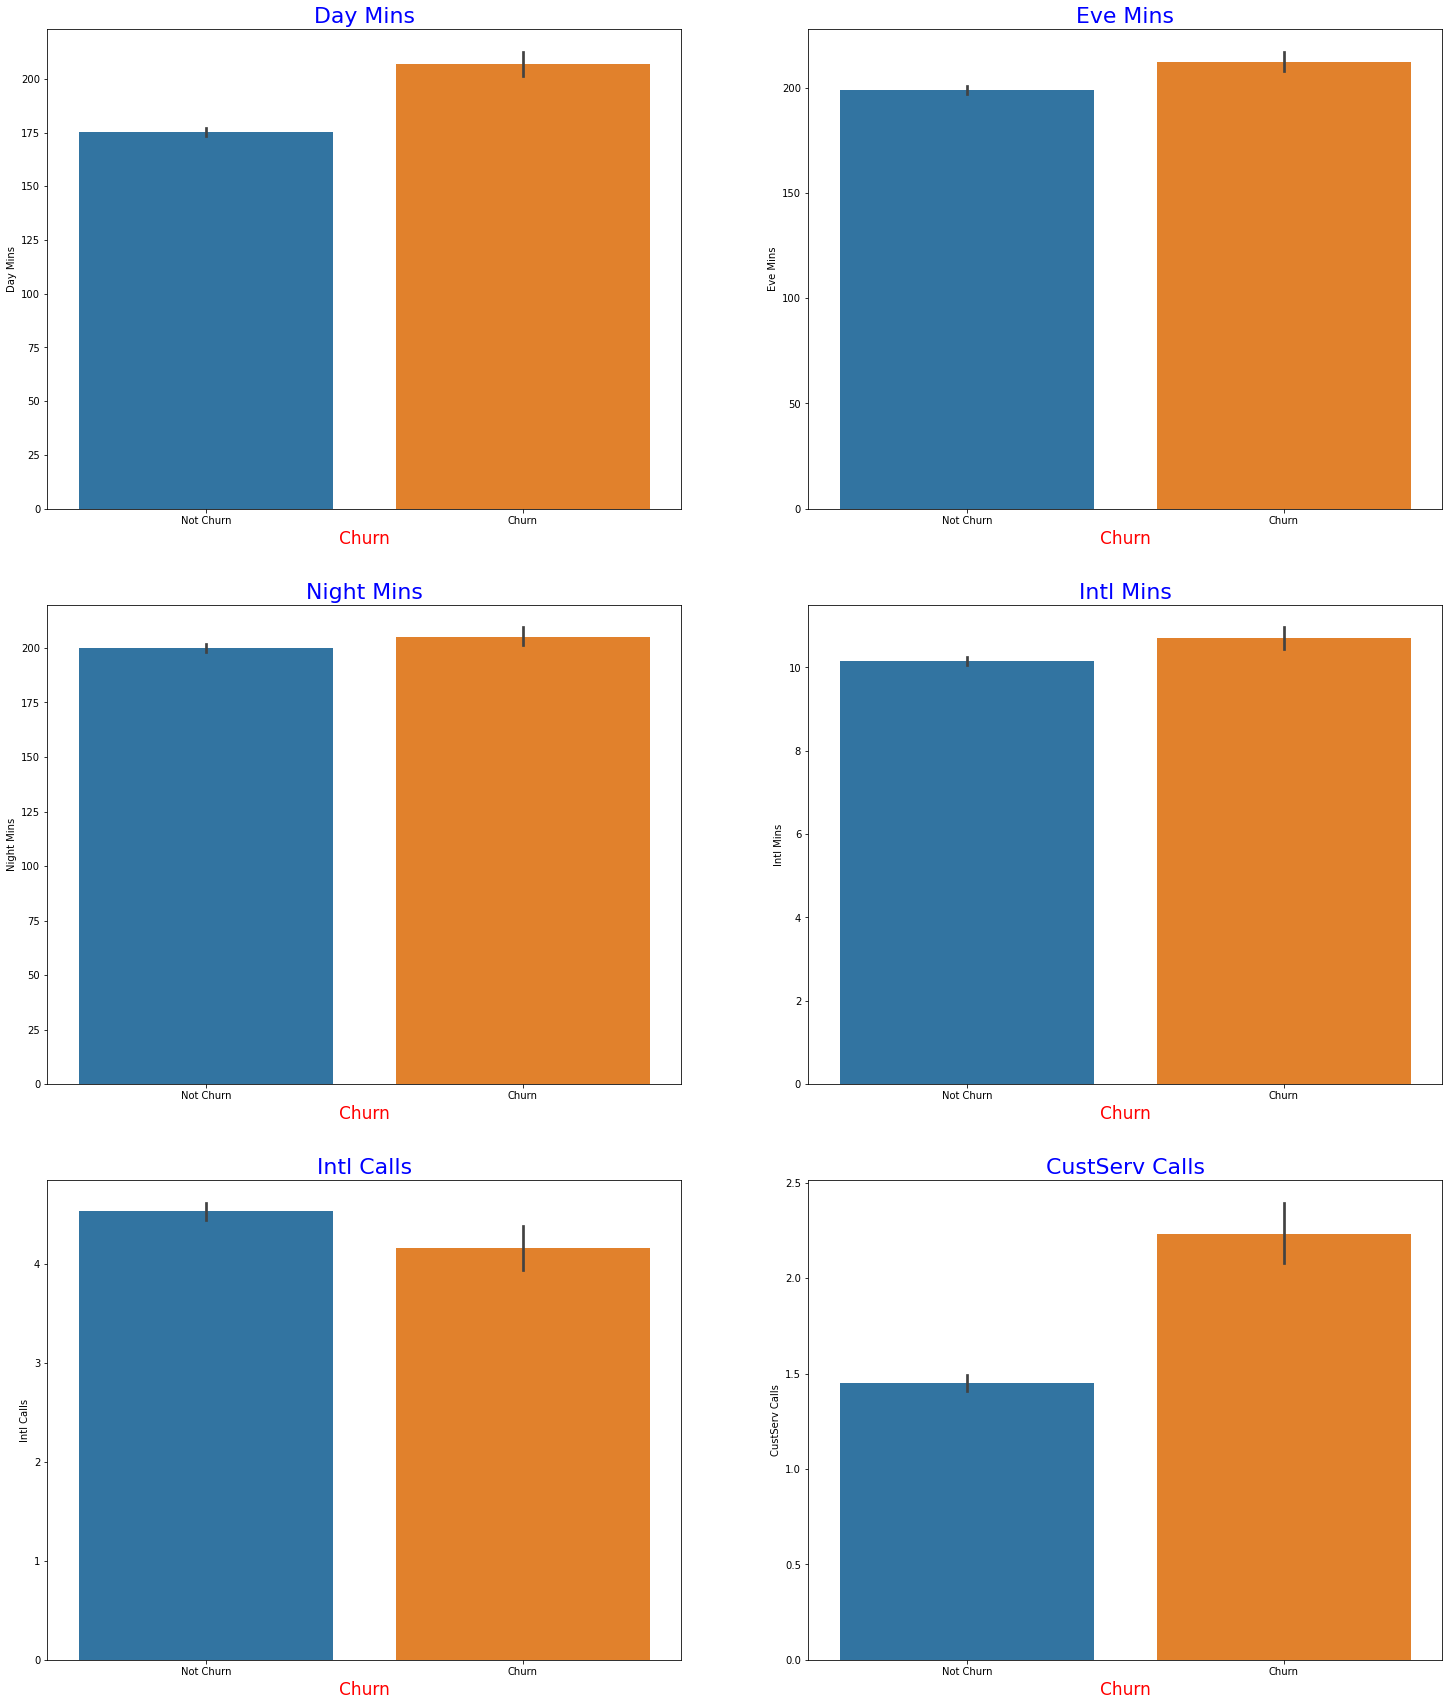

In [15]:
col = ['Day Mins','Eve Mins','Night Mins','Intl Mins','Intl Calls','CustServ Calls']

fig = plt.figure(figsize=(25,30))

for i in range(0,len(col)):
    ax = fig.add_subplot(3,2,i+1)
    ax = sns.barplot(x='Churn',y=col[i],data=df)
    ax.set_xticklabels(['Not Churn','Churn'])
    ax.set_xlabel('Churn',size=17,color='red')
    ax.set_title(col[i],size=22,color='Blue')

### Let's devide our feature and target column to X & Y

In [16]:
Y = df['Churn']
X = df.drop(columns=['Churn'])

### Training and testing sets with test size of 0.2

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#### Shape of newly created data sets

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2666, 8)
(667, 8)
(2666,)
(667,)


# Model Building

### Decision Tree

In [19]:
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,Y_train)

Y_predictd = dmodel.predict(X_test)

### RandomForest

In [20]:
rmodel = RandomForestClassifier(n_estimators=250,criterion='entropy',max_depth=None,random_state=0)
rmodel.fit(X_train,Y_train)

Y_predictr = rmodel.predict(X_test)

### Adaboost

In [21]:
amodel = AdaBoostClassifier()
amodel.fit(X_train,Y_train)

Y_predicta = amodel.predict(X_test)

### Compare the predicted values

In [22]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
     'Desicion Tree':Y_predictd[:7],
     'Random Forest':Y_predictr[:7],
     'AdaBoost':Y_predicta[:7]}
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,Desicion Tree,Random Forest,AdaBoost
1963,Value1,0,0,0,0
2711,Value2,0,0,0,0
3324,Value3,0,0,0,0
2915,Value4,0,0,0,1
970,Value5,0,0,0,0
1595,Value6,0,0,0,0
2456,Value7,0,0,0,1


# Matrix Evaluation

In [23]:
matrix_evaluation = pd.DataFrame({'Kernal' :['Desicion Tree','Random Forest','AdaBoost'],
                                'MAE': [mean_absolute_error(Y_test,Y_predictd),
                                       mean_absolute_error(Y_test,Y_predictr),
                                       mean_absolute_error(Y_test,Y_predicta)], 
                                'MSE': [mean_squared_error(Y_test,Y_predictd),
                                       mean_squared_error(Y_test,Y_predictr),
                                       mean_squared_error(Y_test,Y_predicta)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predictd)),
                                        np.sqrt(mean_squared_error(Y_test,Y_predictr)),
                                        np.sqrt(mean_squared_error(Y_test,Y_predicta))],
                                'R2_score': [r2_score(Y_test,Y_predictd),
                                            r2_score(Y_test,Y_predictr),
                                            r2_score(Y_test,Y_predicta)],
                                'Accuracy Score': [accuracy_score(Y_test,Y_predictd),
                                                  accuracy_score(Y_test,Y_predictr),
                                                  accuracy_score(Y_test,Y_predicta)] })


matrix_evaluation

,Kernal,MAE,MSE,RMSE,R2_score,Accuracy Score
0,Desicion Tree,0.085457,0.085457,0.292331,0.334937,0.914543
1,Random Forest,0.055472,0.055472,0.235526,0.568292,0.944528
2,AdaBoost,0.124438,0.124438,0.352757,0.031575,0.875562


### We can see that, RandomForest has highest accuracy

## Confusion Matrix

In [24]:
cml = confusion_matrix(Y_test, Y_predictd)
cml2 = confusion_matrix(Y_test, Y_predictr)
cml3 = confusion_matrix(Y_test, Y_predicta)

print("\nConfusion matrix of Desicion Tree:\n",cml)
print("\nConfusion matrix of Random Forest:\n",cml2)
print("\nConfusion matrix of AdaBoost:\n",cml3)


Confusion matrix of Desicion Tree:
 [[539  27]
 [ 30  71]]

Confusion matrix of Random Forest:
 [[563   3]
 [ 34  67]]

Confusion matrix of AdaBoost:
 [[544  22]
 [ 61  40]]


#### RandomForest has lowest False values

### Graphical Representation of Confusion Matrix

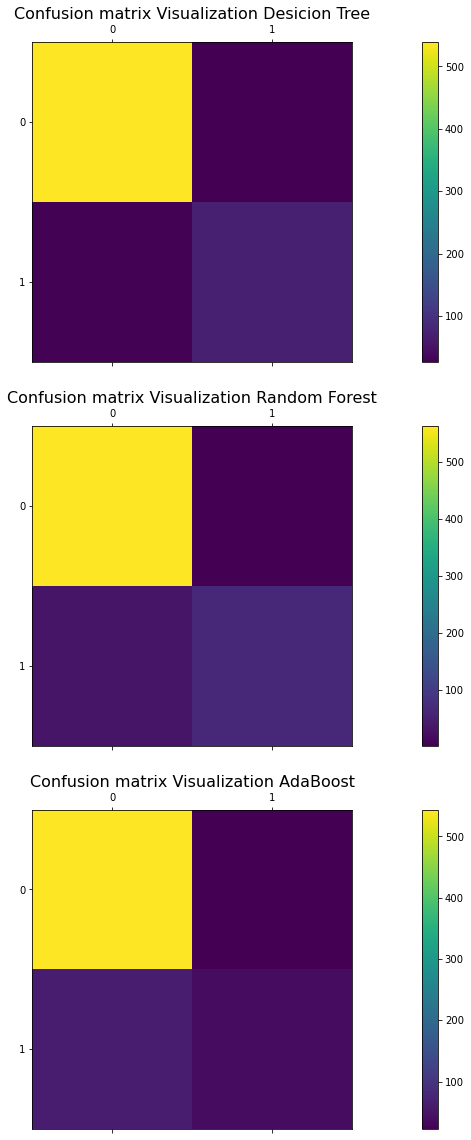

In [25]:
cm = [cml,cml2,cml3]

kname = ['Desicion Tree','Random Forest','AdaBoost']


fig = plt.figure(figsize=(25,20))

for i in range(0,3):
    axes = fig.add_subplot(3,1,i+1)
    mv = axes.matshow(cm[i])
    axes.set_title('Confusion matrix Visualization '+kname[i],size='16')
    fig.colorbar(mv)

## Classification Report

In [26]:
labels = ['Not Churn','Churn']

crl = classification_report(Y_test,Y_predictd,target_names=labels)
crl2 = classification_report(Y_test,Y_predictr,target_names=labels)
crl3 = classification_report(Y_test,Y_predicta,target_names=labels)

print("\n\nClassification Report of Desicion Tree: \n\n",crl)
print("\n\nClassification Report of Random Forest: \n\n",crl2)
print("\n\nClassification Report of AdaBoost: \n\n",crl3)



Classification Report of Desicion Tree: 

               precision    recall  f1-score   support

   Not Churn       0.95      0.95      0.95       566
       Churn       0.72      0.70      0.71       101

    accuracy                           0.91       667
   macro avg       0.84      0.83      0.83       667
weighted avg       0.91      0.91      0.91       667



Classification Report of Random Forest: 

               precision    recall  f1-score   support

   Not Churn       0.94      0.99      0.97       566
       Churn       0.96      0.66      0.78       101

    accuracy                           0.94       667
   macro avg       0.95      0.83      0.88       667
weighted avg       0.95      0.94      0.94       667



Classification Report of AdaBoost: 

               precision    recall  f1-score   support

   Not Churn       0.90      0.96      0.93       566
       Churn       0.65      0.40      0.49       101

    accuracy                           0.88       66

### RandomForest has highest recall and accuracy 

## Predict data fom any Random Number

In [27]:
import random 
random.seed(1234)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(df))

# Selects a random column with random number we found above
trail = df.loc[:,df.columns != 'Churn'].iloc[random_num]

trail

Int'l Plan          0.0
VMail Plan          1.0
Day Mins          211.9
Eve Mins          274.4
Night Mins        210.5
Intl Mins           5.4
Intl Calls          4.0
CustServ Calls      1.0
Name: 3187, dtype: float64

In [28]:
print(X_test.shape)
print(trail.shape)

(667, 8)
(8,)


In [29]:
trail = trail.values.reshape(1,-1)
trail.shape

(1, 8)

### Compare with all the models

In [30]:
pred = pd.DataFrame({'Type': ['Actual value', 'Decision Tree','Random Forest','AdaBoost'],
                     'Value': [df.iloc[random_num]['Churn'], 
                                   dmodel.predict(trail)[0],
                                    rmodel.predict(trail)[0],
                                    amodel.predict(trail)[0] ]})

pred

,Type,Value
0,Actual value,0.0
1,Decision Tree,0.0
2,Random Forest,0.0
3,AdaBoost,0.0


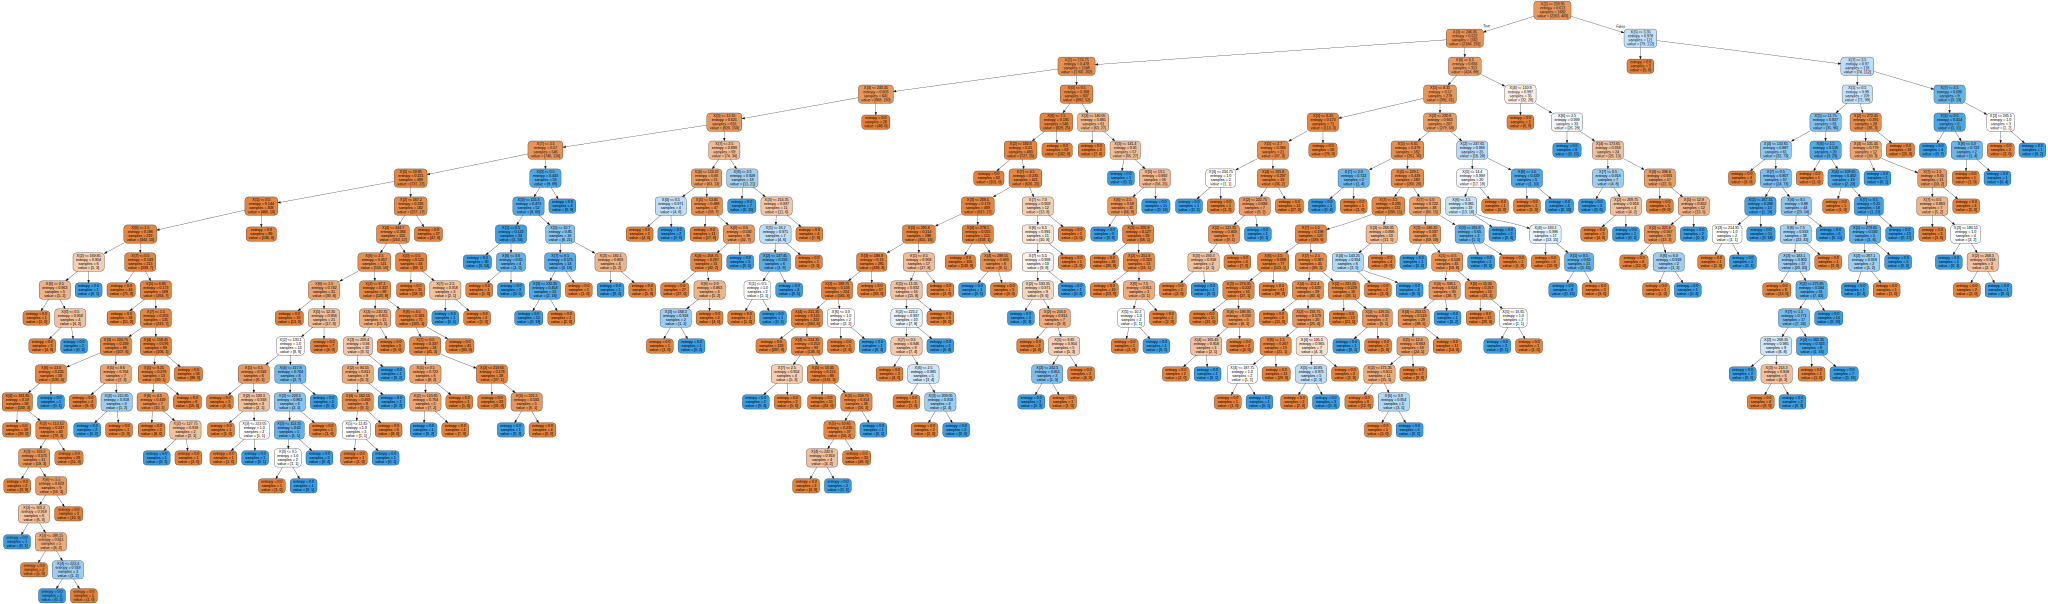

In [31]:
estimator = rmodel.estimators_[10]
estimator

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus


dot_data = tree.export_graphviz(estimator, rounded=True,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("image",view=True)
graph

### We can see that all algorithms predict almost same..
### Yet, RandomForest algorithm from ensemble method has the higher accuracy

#### We can use RandomForest to predict churn customers based on the features we have selected. 
### Company can improve in some of the area like customer call, internation call etc. these features are affecting the target column very much.  So, company should try to satisfy their customers with customer care's good behaviour and good calling schemes.